# Introduction

In this work I'm going to study the Ising formulation of Number partitioning problem in order to write the solver for QUBO problems formulated with Ising model via ${J}_{ij}$ matrix. This solver can be used to solve another problems which could be formulated with Ising model; the only point is to formulate ${J}_{ij}$ matrix implementation for new problem. Moreover, I'm going to study a few algorithms for solving a Community Detection problem as a first step for further research of Ising formulation of this problem.

# Number Partitioning problem

**Formulation**: We need to divide the set of positive number of size N to two subsets of size K and M (K+M=N) in such way, that the sum of elements in each set is equal to each other.

**Example:** 
> init_set = [1,2,4,10,5]

> subset_1 = [1,10] sum_1 = 11

> subset_2 = [2,4,5] sum_2 = 11

**Solution:**

Our task is to formulate a function, which can describe such a system and divide the initial set.

Let's consider a new variable s ('spin') which can have only two values: -1 and 1. This variable will describe the belonging of each number to one of two subsets (described by values -1 and 1 respectively).

Let's consider our function as a sum of all numbers in a set, multiplied by the 'spin' value: 
$$
(\sum{n}_j*{s}_j)
$$


If partitioning is possible, then the function will be equal to zero. So, knowing this fact we can now find the optimal vector **s** by minimizing the function. To be sure, that zero is the global minimum of our function, let's make it quadratic.

So, our function (Hamiltonian) is: 
$$
{(\sum{n}_j*{s}_j)}^2
$$










# "One shot learning"

For such problems like Number partitioning, where we can describe the system using quadratic function, one of the optimal ways to find the global minimum is usage of "One shot learning". It is imperically proven that One shot learning is enougth to get the optimal solution for our problem.

In [ ]:
import numpy as np
import timeit
import time
import matplotlib.pyplot as plt

In [ ]:
def one_shoot_learning(n, j):
  start = time.time()

  lamb = 0.0001

  print(f'Number set is: {n}')
  print('')

  H_outputs = []
  s_outputs = []

  for j in range(j):

    s = np.random.randint(0,high=2,size=n.size)
    s[s==0] = -1
    s=np.array(s, dtype=np.float128)

    s_loop = np.array(s) - lamb * 2 * np.dot(n,s) * np.array(n)

    s_outputs.append(np.sign(s_loop ))
    H_outputs.append(np.square(np.dot(n,np.sign(s_loop))))

  best_H_ind = np.argmin(H_outputs)
  best_s = s_outputs[best_H_ind]


  if H_outputs[best_H_ind]==0:
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print(f'The partioning is: R1 = {n[np.where(best_s==1)]}, R2 = {n[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')
  else:
    print("The set can't be partioned")
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')

  end = time.time()
  print('')
  print(f'Calculation time: {end - start}')

  return best_s;

Let's take a look on the perfomance due to different n implementations

In [ ]:
n = np.array([2,3,4,1])  
one_shoot_learning(n, 20);

Number set is: [2 3 4 1]

Optimal s: [-1. -1.  1.  1.]
H(s) = 0.0
The partioning is: R1 = [4 1], R2 = [2 3]

Additional: number of random initializations: 19, lambda = 0.0001

Calculation time: 0.01545572280883789


In [ ]:
n = np.array(100*np.random.rand(100), dtype = np.float128)
one_shoot_learning(n, 50*n.size);

Number set is: [68.42802071 58.47154548 56.66436102 56.48909859 14.51242583 68.52094558
 73.66676465 25.04797913 75.80112407 38.51513211 15.52501584 45.85045232
 17.6535574  88.02315769 45.63895676  1.33618909 13.37848647 40.99404662
 96.35439474 18.01969741 14.35154552 20.57371445 81.763313   53.21350435
 18.03460714 47.63648885 78.65793986 86.49330755 27.9567458  60.75346262
 35.3262304  45.24026311 68.75622667 37.04450078 16.60620128 14.14243637
  2.15011946 73.70459677 65.12994648 96.98161034 99.49446244 31.33267952
 63.56113804 53.26611235 22.77601576 23.35417552 46.25060642 92.75512529
 68.1819234  49.12683609 27.2889032  26.61841768  3.64107945 20.55402584
 96.22209884 95.22877039 61.03453455 87.77504459 57.04023275 91.15994168
 51.25525216 18.76288769 44.43329654 12.97332087 72.33895199 52.86283578
 60.60562594 26.040787   58.25282562  0.44037819 43.10743067 35.43427232
 93.18683573 29.70675712 20.73440319 17.644898   78.08774641 18.64744513
  3.095893    3.83793712 65.9597135 

In [ ]:
n = np.array(10000*np.random.rand(100), dtype = np.float128)
one_shoot_learning(n, 50*n.size);

Number set is: [3619.91487622 1340.04851053 3038.31556612 8450.39860725  544.53528509
 4160.52695752 3967.60884604 2525.31510053 4928.7226475  7613.99247938
 2398.92060767 9902.39577475 5971.65795933 6021.20760639 8673.78960344
 2912.44715296 6186.0890503  9696.43549356 5877.53059725 1930.1920836
 2512.25166778 4908.52629889 2712.31456507 7633.6549791  6344.82352823
 3943.95481819 6870.13185075 2597.59816105 9088.89888508 1673.70212949
 5181.59287381 5789.47869812 6058.13389807 2195.54374539 1391.2769105
 7523.08788643 9130.8081112  7640.53422447 6048.25065297 9677.71269853
 4163.41149297 3700.34285623   54.02062683 9991.47829456 9775.44491676
  999.13440351 7338.05489952 9135.78139758 8117.54235314 6844.84203936
  769.52817943  904.76576358 3381.60553767 4607.02268388 2464.36643729
 3473.78170162 5356.60463517 4795.89593383 7269.02646544 5236.27020104
  243.04273343 6958.23120802 2659.60091027 3988.20546433 6123.38295662
 7770.73125887 8204.21145259  429.57758027 3151.31153049 8360.96

And here we can face the problem, that due to increazed values in the set algorithm begin working in a wrong way. One of the reasons of such behavior is that we need to initialize much more s vectors just in case to be shure that we can "catch" the right solution.

Let's try it.

In [ ]:
n = np.array(10000*np.random.rand(100), dtype = np.float128)
one_shoot_learning(n, 1000*n.size);

Number set is: [8783.65229728 6328.30116213 4546.50921156 3039.94645239 6310.99662562
 3184.8089625  1626.78489144 2160.17392594 5305.88501249 3731.2888779
 3272.74614819 4025.46381949 9922.15298958 3685.53516862 5960.11580381
 1139.21201248 2333.96339663 8294.3167071  5990.71985524 9419.75708845
 6233.49116705  316.89218644 3095.08064429 4862.17841801 4779.78832433
 1120.44603029 1205.59990264 3642.75245406 9815.75687512 6373.70386433
 6805.1157289  8798.50344299 3096.65233734 6575.33218998 3326.97163819
 8946.89658689 2939.85532833 1944.01664814  604.95858793 6945.6080375
 6506.22467491 7708.36351435 3694.56478639 8348.83564889 7736.67923838
 4061.85236891 9378.79716249 2973.44329732  714.35506203 8616.17627919
 6704.15258458 5221.45689106   28.28763426 7888.93684501 5398.6577227
 6458.10658832 4239.96361464 4482.5480627  8110.37287299 3362.0283936
 3300.97182156 8241.28524613 2847.915994    941.02472916 5751.07887487
 1835.50094496 1379.00681915 2602.26123475  271.9621784  7247.8396

As we can see the disadvantage of One shot learning is the exponential growth of time calculations due to the increase of number set's length. To solve this problem let's take a look on the full dynamic of our gradient descent method. The idea is to provide our system with such dynamic which can decrease the calculation's complexity.

The reason why our algorithm can't find the right solution is oscillations caused in the body of gradient calculation. Our system begin to oscillate from "all positive" to "all negative" states.

We can see it after considering the full dynamic. Moreover, the full dynamic is useful for exploring another problems which we can solve using QUBO implementation.

# Full dynamic study

First of all, let's take a look on full dynamic of our system without any changes. We will just add iterations to the body of the gradient descent and overwriting of s values. 

In [ ]:
def full_dynamic_initial_implement(n):
  start = time.time()

  lamb = 0.0001

  print(f'Number set is: {n}')
  print('')

  H_outputs = []
  s_outputs = []

  s_loop_plot = []
  s_loop_sign_plot = []

  for j in range(10):

    s = np.random.randint(0,high=2,size=n.size)
    s[s==0] = -1
    s=np.array(s, dtype=np.float128)

    for i in range(10):

      s_loop = s - lamb * 2 * np.dot(n,s) * n

      s_loop_plot.append(s_loop)

      s = s_loop
      s_loop_sign_plot.append(np.sign(s_loop))

    s_outputs.append(np.sign(s_loop))
    H_outputs.append(np.square(np.dot(n,np.sign(s_loop))))

  best_H_ind = np.argmin(H_outputs)
  best_s = s_outputs[best_H_ind]

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_plot[2*i:3*i+1])
  plt.title("S values for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_sign_plot[2*i:3*i+1])
  plt.title("S values (np.sign) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(j+1),s_outputs, 'o')
  plt.title("S values (np.sign) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  if H_outputs[best_H_ind]==0:
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print(f'The partioning is: R1 = {n[np.where(best_s==1)]}, R2 = {n[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')
  else:
    print("The set can't be partioned")
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')

  end = time.time()
  print('')
  print(f'Calculation time: {end - start}')

  return best_s,s_plot,s_loop_plot;

Number set is: [21.20333936 79.60192515 78.17946146 90.24822524  3.19617501  1.41407258
  1.27944945 30.96416864 12.56504008  1.06055439 68.71897076 60.0910848
 31.56587988 56.77022461 97.75206708 55.96950127  4.03989994 97.29752069
 84.9531035  56.066119   20.26592758 99.0819555  48.23838127  4.4950477
 56.18413977  8.32878013 68.37657669  0.73878517 18.40227175 75.60496012
 79.75208131 12.55069665 13.54312429 42.05058788 18.92604317 91.40399381
 73.19896685 98.61415977 15.40634279 79.96362655 14.86028645 61.53299931
  5.46866398 82.33771536 85.34540674 76.92583335 98.84071129 37.93097592
 36.66717944 37.89374764 19.65682012 69.3538474  99.45589326 81.32899903
 83.89733922 52.24264549 43.15343397 87.79137012 96.95971515 40.17553861
 48.13928393 68.32182503 99.44321703 72.06105988 13.14158647 80.88500286
 14.12096394 51.2491186  64.12426487 44.17788816 41.74297428 95.48652418
 49.93626379 64.66046952 54.14149135 77.01883282 30.79845476 97.99708906
 38.45744788 83.47872377 17.94756176 2

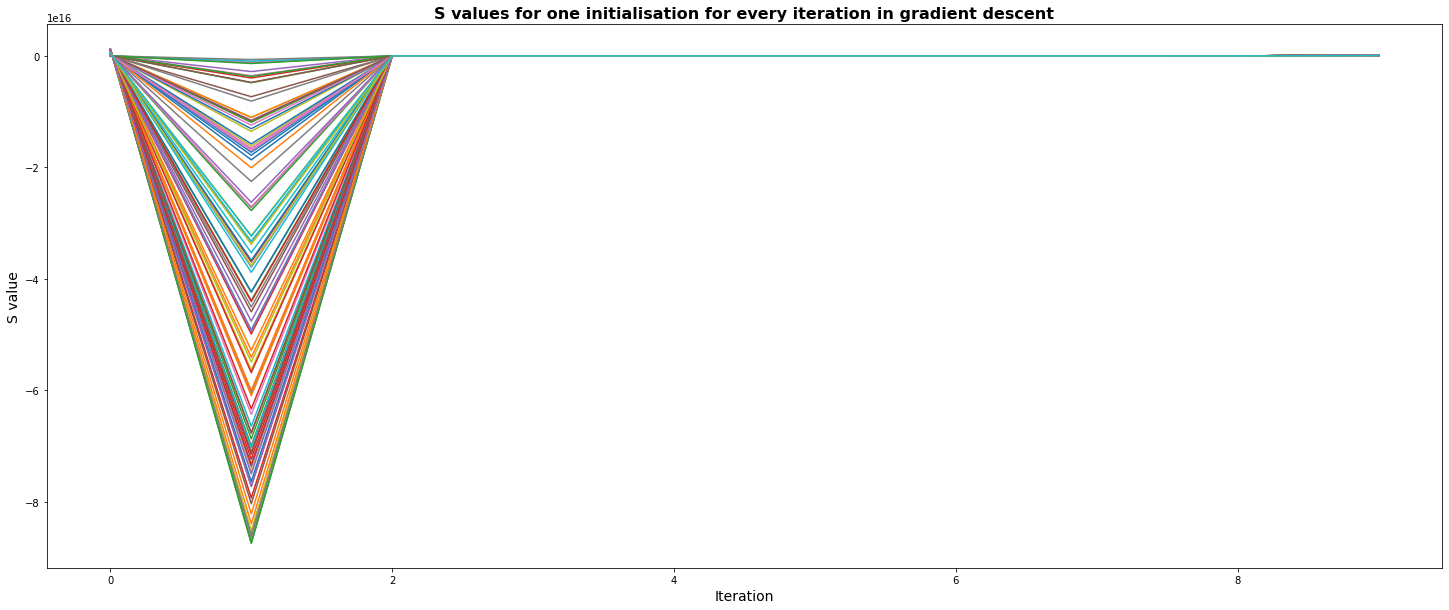

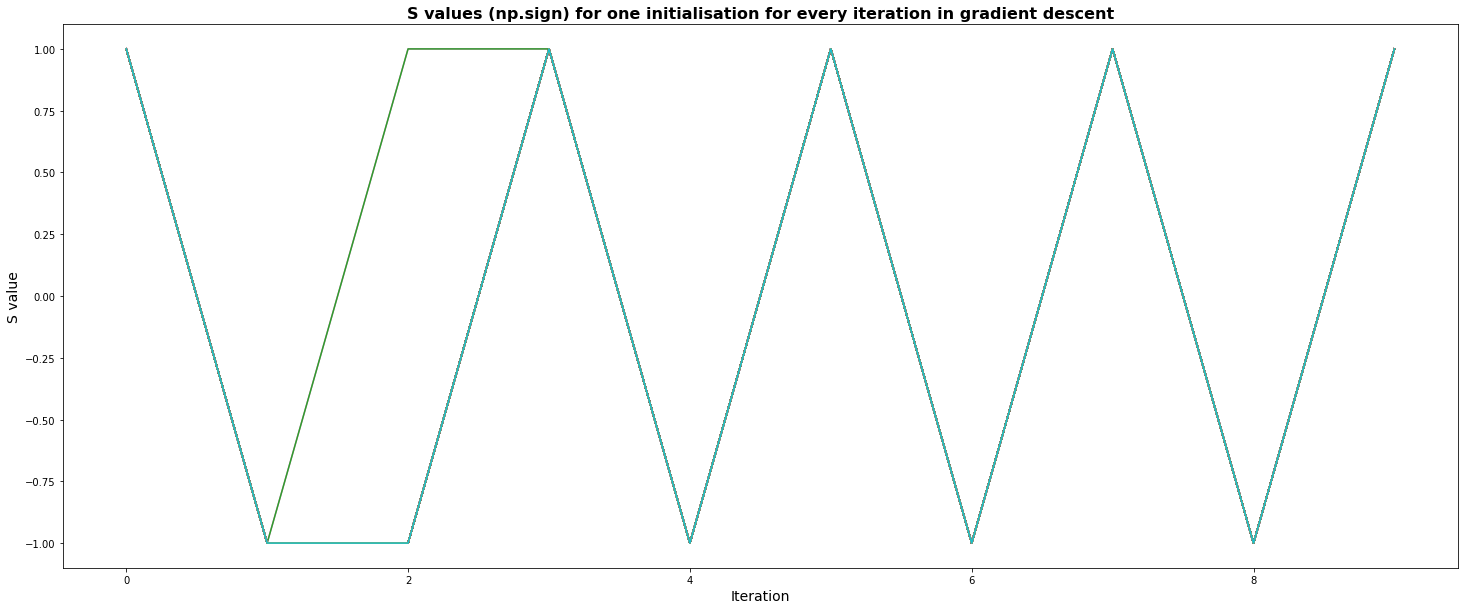

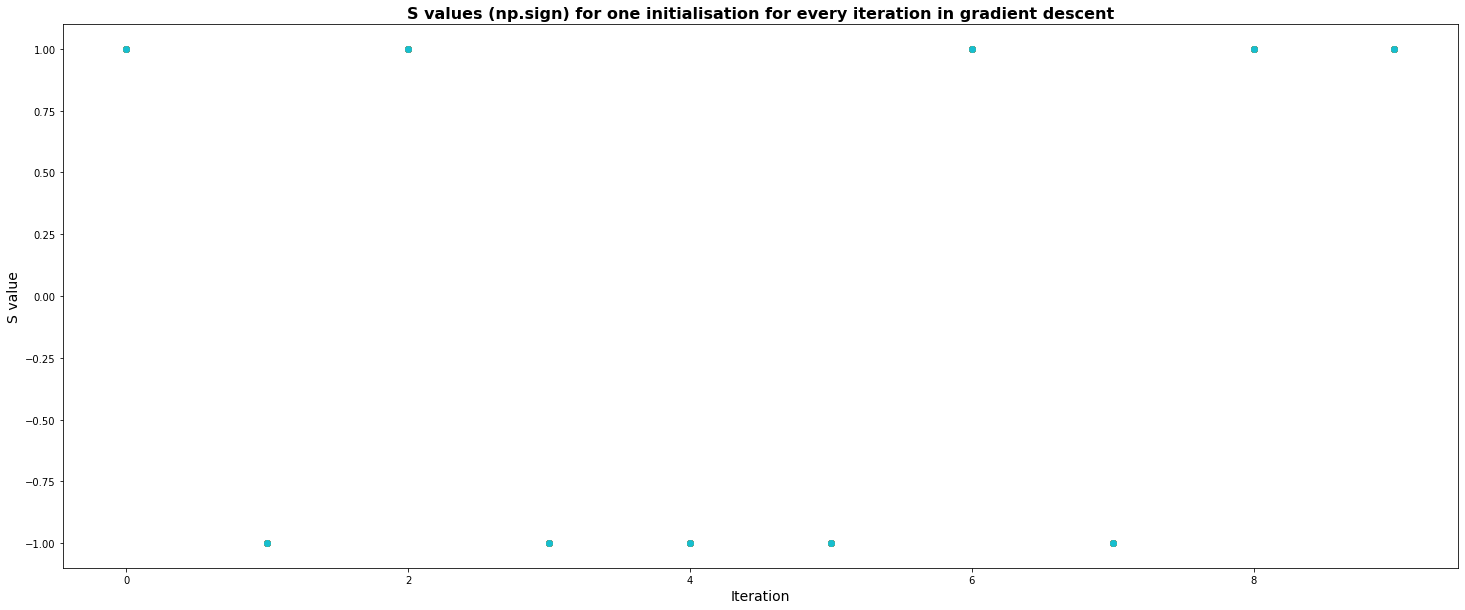

In [ ]:
n = np.array(100*np.random.rand(100), dtype = np.float128)
best_s,s_plot,s_loop_plot = full_dynamic_initial_implement(n);

As we can see, after each iteration in gradient descent, our s vector takes  "all positive" or "all negative" values. It happens because of the increasing value of np.dot function. As a result, vector **s** is subtracted by large value and vector values themselves become "all positive" or "all negative".


Now we can see the reason, why our algorithm is not working correct. We need to somehow limit the s values to make our algorithm work smoother and get rid of oscillation behavior.

Let's first of all define that we will use tanh() function to limit the s values growth. 

In [ ]:
def full_dynamic_corrected_1st_implement(n):
  
  start = time.time()

  lamb = 0.0001

  print(f'Number set is: {n}')
  print('')

  H_outputs = []
  s_outputs = []

  s_loop_plot = []
  s_tanh_plot = []
  s_loop_sign_plot = []
  gradient_plot = []


  for j in range(5*n.size):

    s = np.random.randint(0,high=2,size=n.size)
    s[s==0] = -1
    s=np.array(s, dtype=np.float128)

    for i in range(20):

      s = np.tanh(0.1*s)

      s_tanh_plot.append(s)
      
      s_loop = s - lamb * 2 * np.dot(n,s) * n

      s_loop_plot.append(s_loop)

      s = s_loop

      s_loop_sign_plot.append(np.sign(s_loop))

    s_outputs.append(np.sign(s_loop))
    H_outputs.append(np.square(np.dot(n,np.sign(s_loop))))

  best_H_ind = np.argmin(H_outputs)
  best_s = s_outputs[best_H_ind]

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_plot[2*i:3*i+1])
  plt.title("S values for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_tanh_plot[2*i:3*i+1])
  plt.title("S values (np.tanh) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_sign_plot[2*i:3*i+1], 'o')
  plt.title("S values (np.sign) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)
  

  if H_outputs[best_H_ind]==0:
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print(f'The partioning is: R1 = {n[np.where(best_s==1)]}, R2 = {n[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')
  else:
    print("The set can't be partioned")
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')

  end = time.time()
  print('')
  print(f'Calculation time: {end - start}')

  return best_s,s_plot,s_loop_plot;
 

Now, let's take a look, how the tanh() function will influence our system.

Number set is: [3.83553113e+01 4.09083250e+01 3.00536254e+01 8.82676904e+01
 1.68817109e+01 1.93329405e+00 7.01404502e+01 1.65636695e+01
 2.56324668e+01 8.97768969e+00 5.17378317e+01 2.75227404e+01
 4.70269536e+01 9.31025557e+01 2.44687993e+01 1.57323904e+01
 8.78409080e+01 6.33287079e+01 4.67296366e+01 2.55301670e+01
 5.44019016e+01 1.24894514e+01 4.94874891e+01 3.67402564e+01
 9.73658980e+01 2.57463170e+01 8.76527658e+01 2.06739507e+01
 8.81597009e+01 1.95273201e+01 1.19771731e+00 5.02938446e+01
 6.74259572e+01 4.81115892e+01 4.74488241e+01 4.14402218e-01
 5.77706869e+01 6.76628727e+01 7.94296864e+01 7.01997443e+01
 5.32451393e+01 5.16730693e+01 8.77204846e+01 8.46599463e+00
 6.12680440e+01 8.96892433e-02 7.39823843e+01 8.80736029e+01
 8.11252467e+01 9.86524333e+01 8.10214691e+01 8.89828287e+00
 2.12469339e+01 8.58963064e+01 9.94705522e+01 1.25963552e+01
 9.67443998e+01 8.22427955e+01 9.36497327e+01 3.75793082e+01
 4.62566933e+01 7.38762996e+01 2.30332052e+01 6.73745956e+01
 9.707662

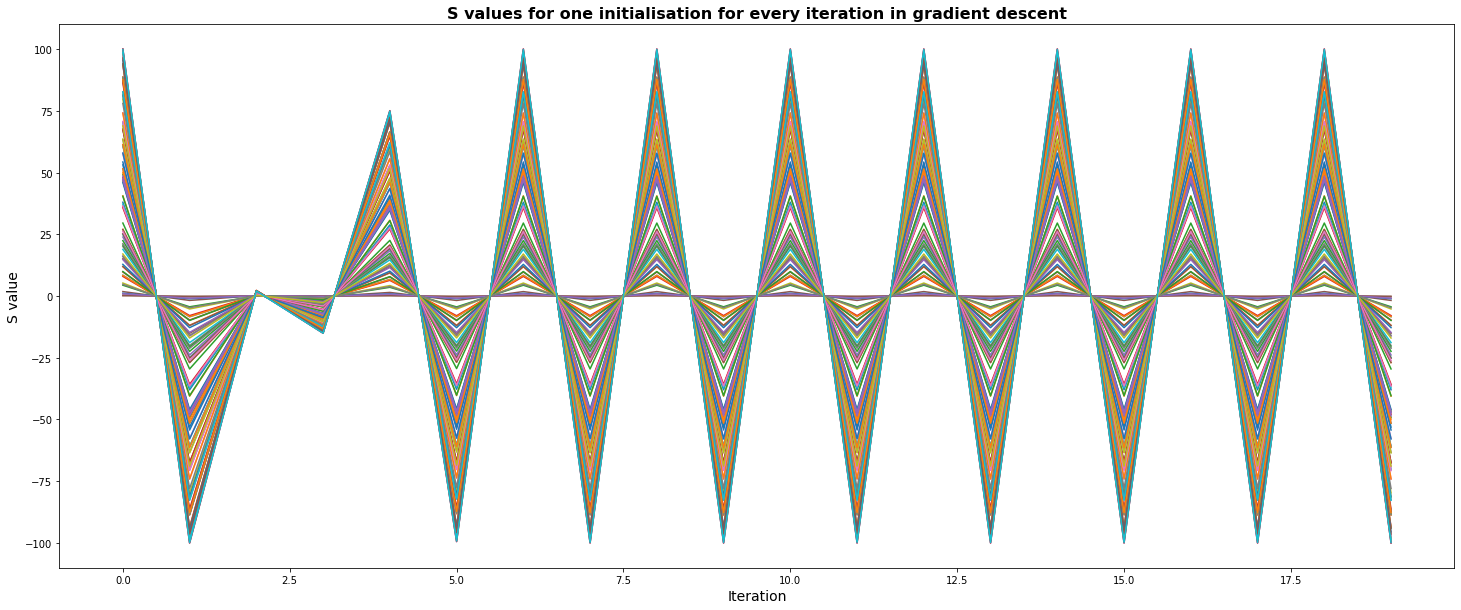

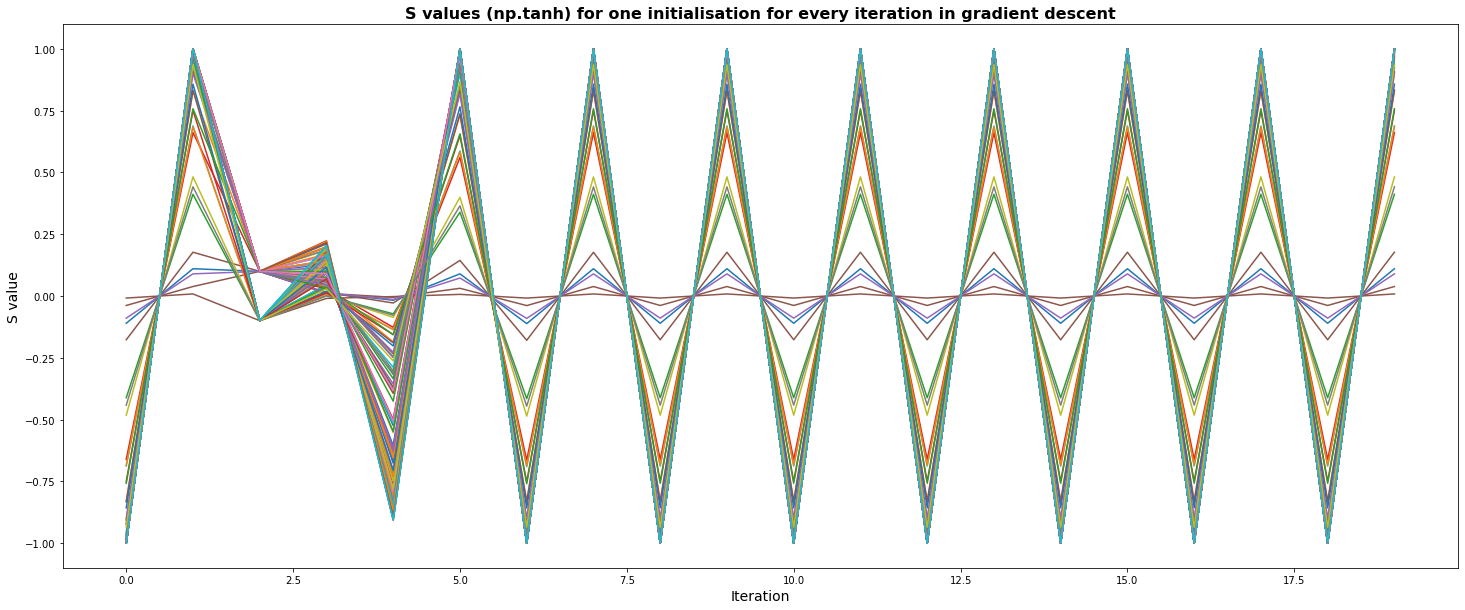

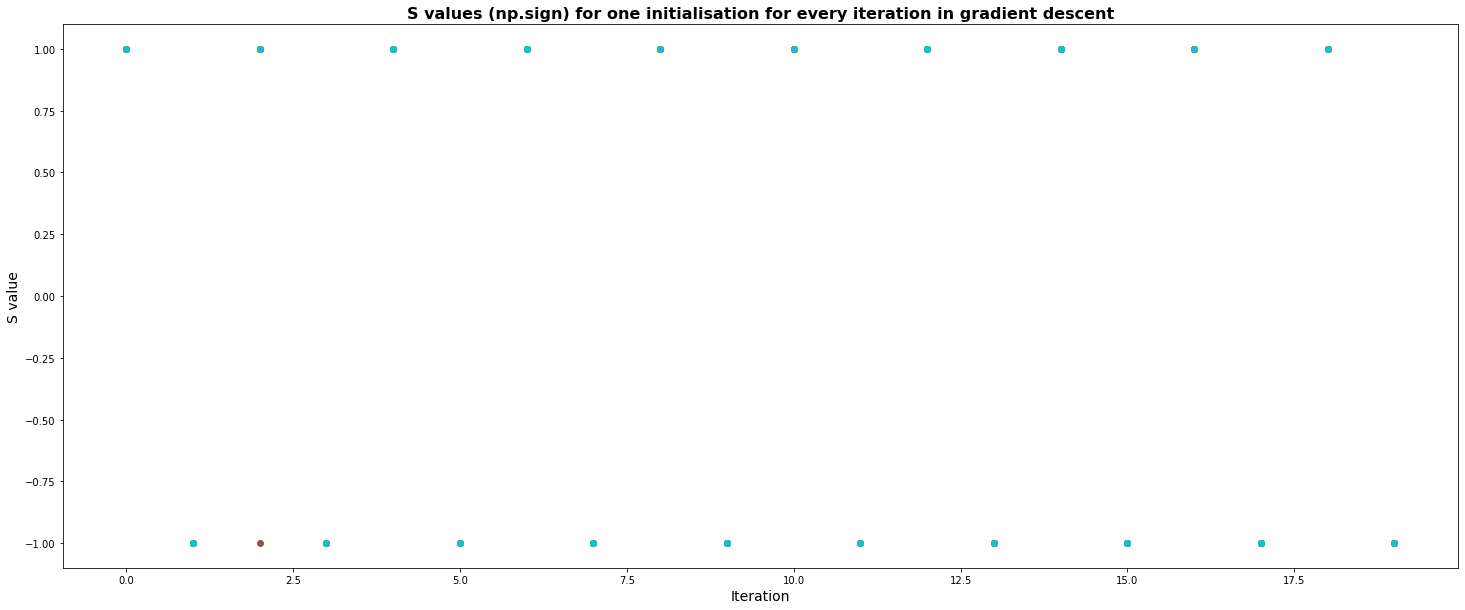

In [ ]:
n = np.array(100*np.random.rand(100), dtype = np.float128)
best_s,s_plot,s_loop_plot = full_dynamic_corrected_1st_implement(n);

As we can see, we steel observe the oscillating behavior of our system.

Now, let's try to modify the gradient calculation. First of all, as we will know from future Jij implementation, we are not interested in quadratic sums, because they are not influence on our system, so let's consider only partial sums. (Our Jij matrix has zeroes elements on main diagonal, which describe the jj elements interaction)

In [ ]:
def full_dynamic_corrected_2nd_implement(n):
  
  start = time.time()

  lamb = 0.0001

  print(f'Number set is: {n}')
  print('')

  H_outputs = []
  s_outputs = []

  s_loop_plot = []
  s_plot = []
  s_tanh_plot = []
  s_loop_sign_plot = []
  gradient_plot = []


  for j in range(20):

    s_loop = np.random.randint(0,high=2,size=n.size)
    s_loop[s_loop==0] = -1
    s_loop=np.array(s_loop, dtype=np.float128)

    for i in range(400):

      s=np.tanh(0.1*s_loop)
      s_plot.append(s)

      diff = (- np.dot(n,s) * n + n*s*n)
      s_loop = s_loop + lamb*diff
      s_loop_plot.append(s_loop)
      
      gradient_plot.append(diff)

      s_loop_sign_plot.append(np.sign(s_loop))

    s_outputs.append(np.sign(s_loop))
    H_outputs.append(np.square(np.dot(n,np.sign(s_loop))))

  best_H_ind = np.argmin(H_outputs)
  best_s = s_outputs[best_H_ind]

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_plot[2*i:3*i+1])
  plt.title("S values for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_plot[2*i:3*i+1])
  plt.title("S values (np.tanh) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_sign_plot[2*i:3*i+1])
  plt.title("S values (np.sign) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)
  

  if H_outputs[best_H_ind]==0:
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print(f'The partioning is: R1 = {n[np.where(best_s==1)]}, R2 = {n[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')
  else:
    print("The set can't be partioned")
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    #print(f'The partioning is: R1 = {np.array(n)[np.where(best_s==1)]}, R2 = {np.array(n)[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')

  end = time.time()
  print('')
  print(f'Calculation time: {end - start}')

  return best_s,s_plot,s_loop_plot;
 

Number set is: [71.78440214 48.36693129 40.16547403 23.26370905 29.78228265 10.56029878
 77.87037312 94.18478138 39.31426548  2.71791706 73.5080618  91.67248748
 53.62843313 42.40285612 49.9086627  42.9281633  62.09979415 91.0836973
 63.10845016 32.73411076 88.89230311 33.07256907 36.78985058 76.71444953
 22.63229796 28.97418893 75.82883167 21.15068806 93.04940662 64.70834157
 54.66145658 58.00950036 29.64740396 86.2884322  28.08492287 46.87034536
 91.14828915 94.65446541 73.4640696  66.56642827 55.07582691 92.37493411
 18.40811202 89.55837959 15.2819651  75.39260413 29.52847638 57.93944477
 49.22275635 97.94101239  5.74593645 68.39383467 47.09101843 76.51225921
 88.94093696 59.18204333 70.88336787 13.14607025 80.49569173 87.78233597
 57.53395865 18.97291744 78.76055634 42.30260658 77.59245713 54.46221522
 29.84181633 67.0472021  10.70658562 82.93744153 84.40134489 66.33000013
 58.78757603 26.81678308  7.61983077  9.14147672 75.77302327 89.36775915
 94.86156319 98.40848784 69.73090493 

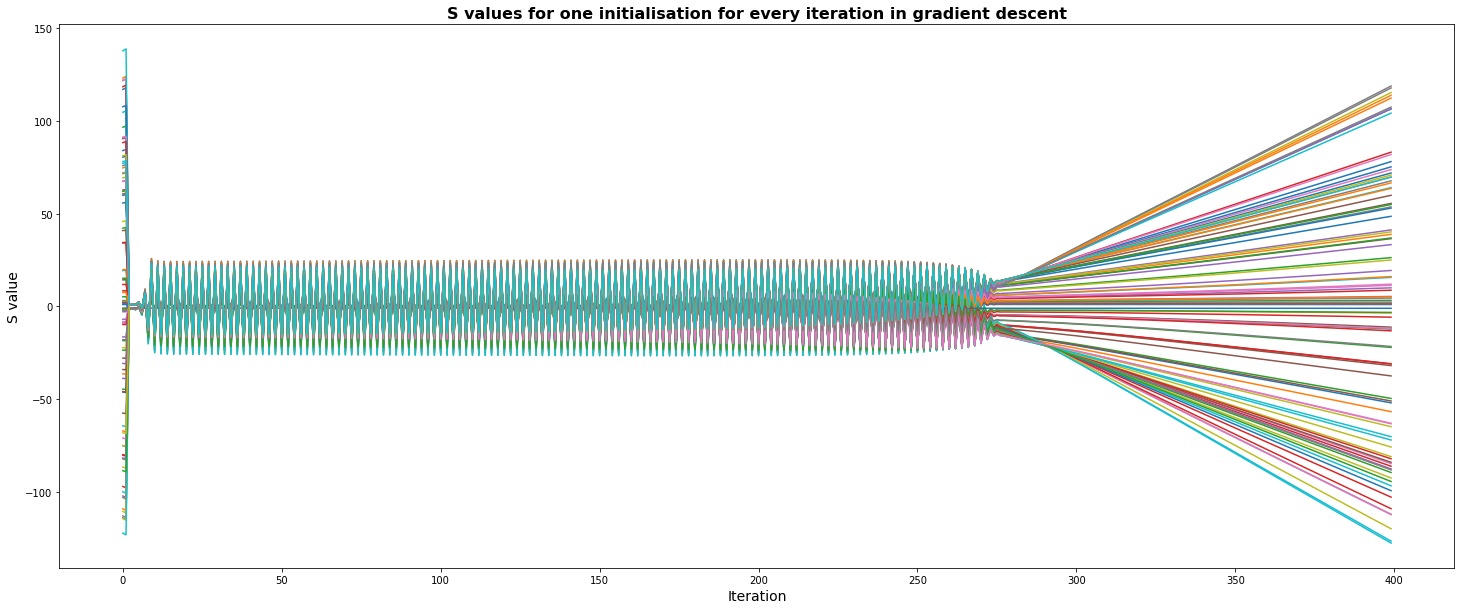

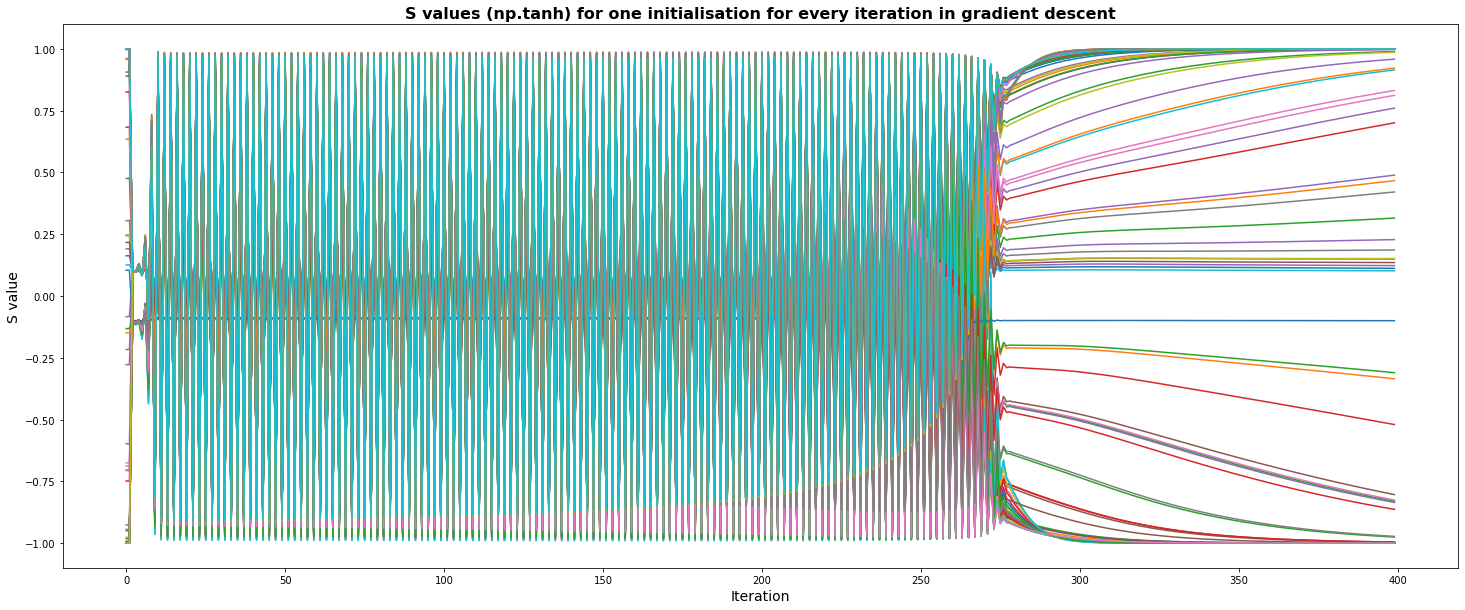

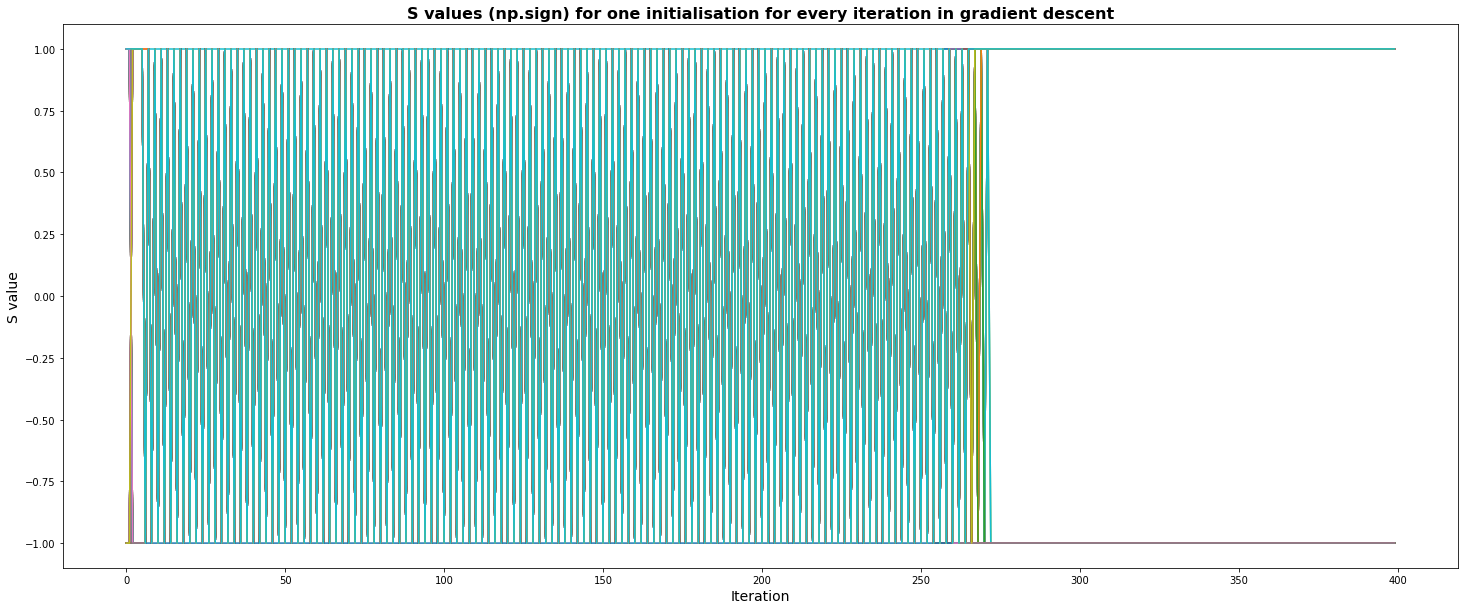

In [ ]:
n = np.array(100*np.random.rand(100), dtype = np.float128)
best_s,s_plot,s_loop_plot = full_dynamic_corrected_2nd_implement(n);

As we can see, our dynamic became smoother, but we steel can observe the oscillating behavior during first oscillations. Our aim is to get rid of iterations at all and make our algorithm to find the optimal solution as fast, as possible. 

We can implement our algorithm as a Hopfield neural network, so we will add one more parameter **tau** (as a result, we have three main parameters of our algorithm: **lambda**, **beta**, **tau**) and our gradient calculations will be changed due to the Hopfield network formulation.

Moreover, we will initialize the s vector values in some segment ([-5,5] for example) as empirically we understand, that such initial point can provide us with better solutions.

We will use the Hopfield method because we know that we are trying to describe the physical system, which behaves like a Hopfield system.

# About Hopfield approach and Ising formulation

As was mentioned above, we are going to use Hopfield description of our system. The reason is that we observe physical system with such behavior (exciton polariton). Previously we were considering one shot learning approach which describes the photon interaction with internal field, which is an ideal system. But in fact our system is usually affected by external conditions, which can be described using Hopfield approach.

Using Ising formulation of the problem means that we need to reformulate the problem in such way that it could be solved by physical system of photons which can be described by Ising Hamiltonian. We want our problem to be solved in "natural" way by physical system itself. In this case, the only functionality our system can provide is minimization of it's Hamiltonian function as we know that every quantum system always has the ground state. So we can always find some minimal energy of our system. A classical Ising model can be written as a quadratic function of a set of N spins ${s}_i$ = ±1:
$$
\sum{J}_{ij}*{s}_i*{s}_j - \sum{h}_i*{s}_i
$$


Here is a brief description of Ising model application to NP-hard problems.

**[Ising formulations of many NP problems. Andrew Lucas. Department of Physics, Harvard University, Cambridge, MA, USA 02138]**:

*Ising spin glasses4 are known to be NP-hard problems for classical computers, so it is natural to suspect intimate connections with all other NP problems. For the purposes of this paper, an NP-complete problem is always a decision problem with a yes or no answer (does the ground state of H have energy ≤ 0?), whereas an NP-hard problem is an optimization problem (what is the ground state energy of H?). The class of NP-complete problems includes a variety of notoriously hard problems, and has thus attracted much interest over the last 40 years. Mathematically, because the decision form of the Ising model is NP-complete, there exists a polynomial time mapping to any other NP-complete problem.
Analogies between the statistical physics of Ising spin glasses and NP problems have been frequently studied in the past, and have been used to construct simulated annealing algorithms which have been quite fruitful in approximate algorithms for problems on classical computers. These connections have suggested a physical understanding of the emergence of hardness in these problems via a complex energy landscape with many local minima. Conversely, computational hardness of solving glassy problems has implications for the difficulty of the solutions to important scientific problems ranging from polymer folding to memory to collective decision making in economics and social sciences. Problems of practical scientific interest have already been encoded and solved (in simple instances) on experimental devices using Ising Hamiltonians.
Finally, we note that Ising glasses often go by the name QUBO (quadratic unconstrained binary optimization), in the more mathematical literature. Useful tricks have been developed to fix the values of some spins immediately and to decompose large QUBO problems into smaller ones.*


# Full dynamic (not optimized)

In [ ]:
def full_dynamic(n):
  start = time.time()

  lamb = 0.0001
  beta = 0.1
  tau = 1

  print(f'Number set is: {n}')
  print('')

  H_outputs = []
  s_outputs = []

  s_loop_plot = []
  s_plot = []
  s_loop_sign_plot = []

  for j in range(20):

    s_loop = 10.0*np.random.rand(n.size) - 5.0*np.ones(n.size)

    for i in range(600):

      s=np.tanh(beta*s_loop)
      s_plot.append(s)

      diff = (-s_loop/tau - np.dot(n,s) * n + n*s*n)
      s_loop = s_loop + lamb*diff

      s_loop_plot.append(s_loop)
      s_loop_sign_plot.append(np.sign(s_loop))

    s_outputs.append(np.sign(s_loop))
    H_outputs.append(np.square(np.dot(n,np.sign(s_loop))))

  best_H_ind = np.argmin(H_outputs)
  best_s = s_outputs[best_H_ind]

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_plot[0*i:1*i+1])
  plt.title("S values for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_plot[0*i:1*i+1])
  plt.title("S values (np.tanh) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_sign_plot[0*i:1*i+1])
  plt.title("S values (np.sign) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(j+1),s_outputs, 'o')
  plt.title("S values at the end of gradient descent algorithm for every initialization", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  if H_outputs[best_H_ind]==0:
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print(f'The partioning is: R1 = {np.array(n)[np.where(best_s==1)]}, R2 = {np.array(n)[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')
  else:
    print("The set can't be partioned")
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    #print(f'The partioning is: R1 = {np.array(n)[np.where(best_s==1)]}, R2 = {np.array(n)[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}')

  end = time.time()
  print('')
  print(f'Calculation time: {end - start}')


Number set is: [92.15849286 27.05690189 55.63471886 48.49788624 94.82702264 65.35598936
 43.26087353 58.80975264 45.72812163 67.49514321 10.98796892 55.28590352
 52.80416509 17.08212564 54.00924162 33.9804066  20.73244687 60.05580568
 51.24923054 54.04346362 85.31261844 68.63667248 56.35703774 63.52010676
 15.29232826 46.36261916 72.12132344 73.31737349 92.79270907 56.30165119
  1.84669043 11.78783974 57.04343178 65.38812717 25.73695236 96.38539824
  6.79703563 11.1029706  43.09569229 37.190584   20.88153874 48.64184437
 17.93615746 35.53717112 87.82047417 56.46770515 23.07720126 95.75099684
  3.10541655 40.74554286  3.53342414 69.25513288 66.79665197 25.0995115
 11.61444662 97.02569625 31.5973815  46.50351936 50.45813713  8.65711468
 31.5062189   0.76544874 35.80053932 12.35622536 88.73961656 70.42466562
 20.85966019 52.08223574 75.83715395 28.92039918 11.9142286  19.93388517
 77.74632032 98.93840421 40.1945937  23.88074394 73.48970488 64.27747607
 20.76745231 43.53611882 77.92289728 

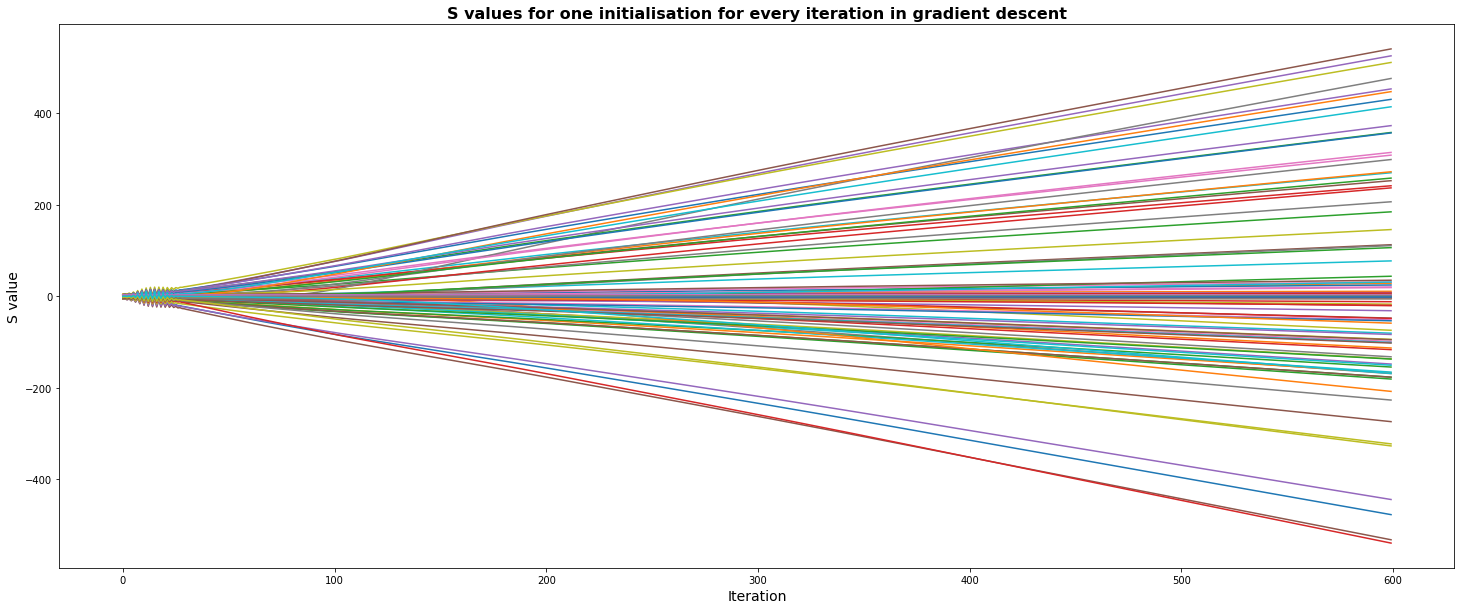

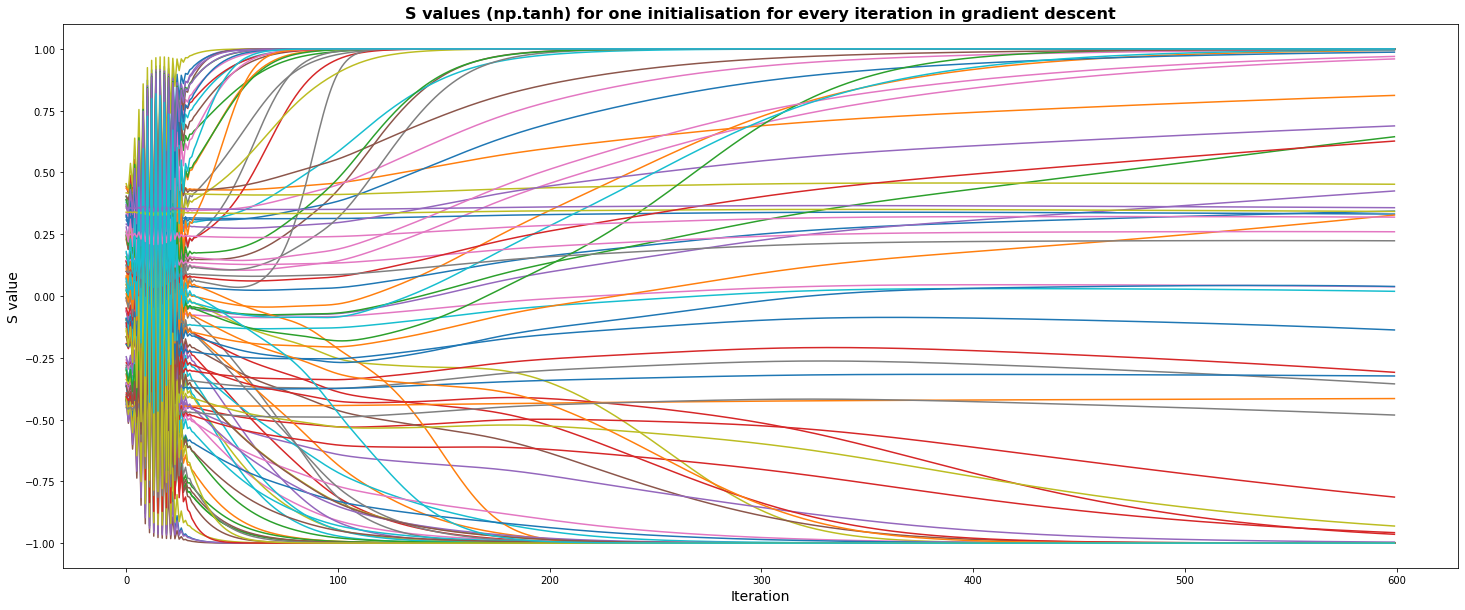

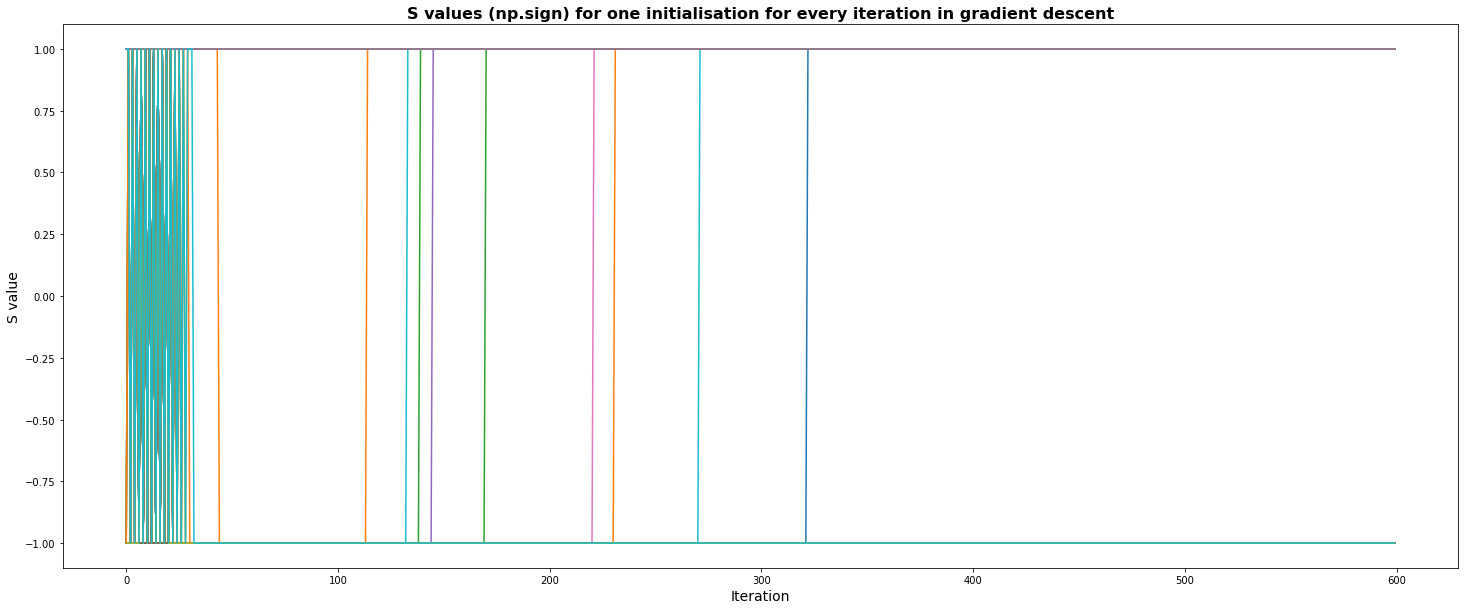

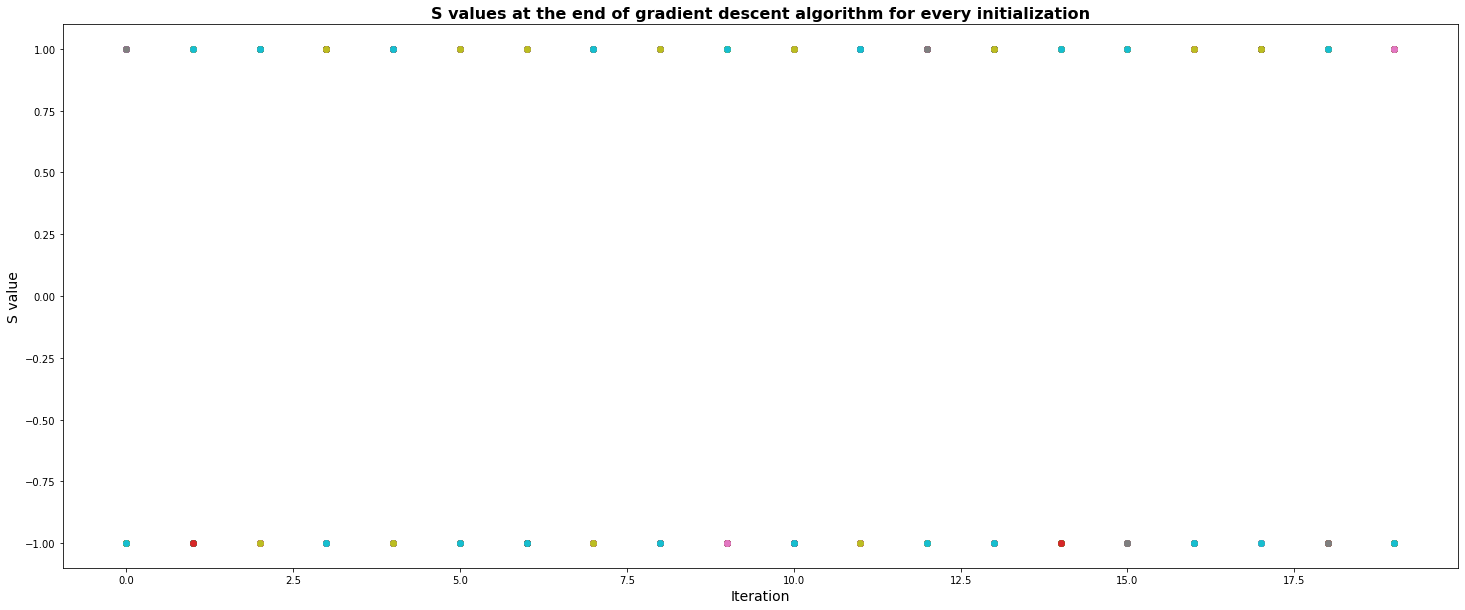

In [ ]:
import matplotlib.pyplot as plt
n = np.array(100*np.random.rand(100), dtype = np.float128)
full_dynamic(n);

Now we need to optimize parameters of our system in such way to make our algorithm find the solution without oscillations.

We are interested in sets with size 1000.

The optimized parameters are: **lamb** = 7.7e-07; **beta** = 0.1; **tau** = 100.0

Let's observe the work of our complete algorithm.



# Full dynamic (optimized)

In [ ]:
def full_dynamic(n):

  start = time.time()

  lamb = 7.742636826811278e-07 
  beta = 0.1
  tau = 100.0

  print(f'Number set is: {n}')
  print('')

  H_outputs = []
  s_outputs = []

  s_loop_plot = []
  s_plot = []
  s_loop_sign_plot = []

  for j in range(80):

    s_loop = 10.0*np.random.rand(n.size) - 5.0*np.ones(n.size)

    for i in range(1000):

      s=np.tanh(beta*s_loop)
      s_plot.append(s)

      diff = (-s_loop/tau - np.dot(n,s) * n + n*s*n) #
      s_loop = s_loop + lamb*diff

      s_loop_plot.append(s_loop)
      s_loop_sign_plot.append(np.sign(s_loop))

    s_outputs.append(np.sign(s_loop))
    H_outputs.append(np.square(np.dot(n,np.sign(s_loop))))

  best_H_ind = np.argmin(H_outputs)
  best_s = s_outputs[best_H_ind]

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_plot[0*i:1*i+1])
  plt.title("S values for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_plot[0*i:1*i+1])
  plt.title("S values (np.tanh) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_sign_plot[0*i:1*i+1])
  plt.title("S values (np.sign) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(j+1),s_outputs, 'o')
  plt.title("S values at the end of gradient descent algorithm for every initialization", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  if H_outputs[best_H_ind]==0:
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print(f'The partioning is: R1 = {np.array(n)[np.where(best_s==1)]}, R2 = {np.array(n)[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}, epsilon = {eps}')
  else:
    print("The set can't be partioned")
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    #print(f'The partioning is: R1 = {np.array(n)[np.where(best_s==1)]}, R2 = {np.array(n)[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}, beta = {beta}, tau = {tau}')

  end = time.time()
  print('')
  print(f'Calculation time: {end - start}')


Number set is: [4.72510051e+01 7.55632413e+01 9.14241836e+01 5.01384757e+01
 3.71128295e+01 6.13615311e+01 7.30367052e-01 7.72464449e+01
 5.94391842e+01 6.60963621e+01 9.66911502e+00 3.23888646e+01
 8.46593222e+01 8.45609245e+01 1.28005643e+01 4.05460736e+01
 1.90409517e+01 2.22964369e+01 2.71361444e+00 4.25716175e+01
 5.38711524e+01 2.04555480e+01 1.82412996e+01 2.94967151e+01
 1.67379882e+01 8.34219023e+01 1.20318070e+01 8.30560393e+01
 3.74023168e+01 9.41121096e+01 5.42636142e+01 3.20840954e+00
 2.95147443e+01 8.31575920e+01 2.08099019e+01 4.53949307e+01
 8.62546639e+01 9.29883783e+01 9.62501197e+01 3.94419981e+01
 6.58466947e+01 8.00553483e+01 6.39445543e+01 7.55182277e+01
 8.27272358e+01 7.16138526e+01 8.80010839e+01 4.84381639e+01
 3.13794563e+01 8.78049123e+01 7.38745037e+00 2.35790811e+01
 8.98125125e+01 2.09562261e+00 8.30527048e+01 1.80424163e+00
 8.90616591e+01 9.57965905e+01 1.09170413e+01 4.53641287e+01
 1.78826901e+01 6.41589543e+01 9.77830468e+01 1.79269154e+01
 6.738033

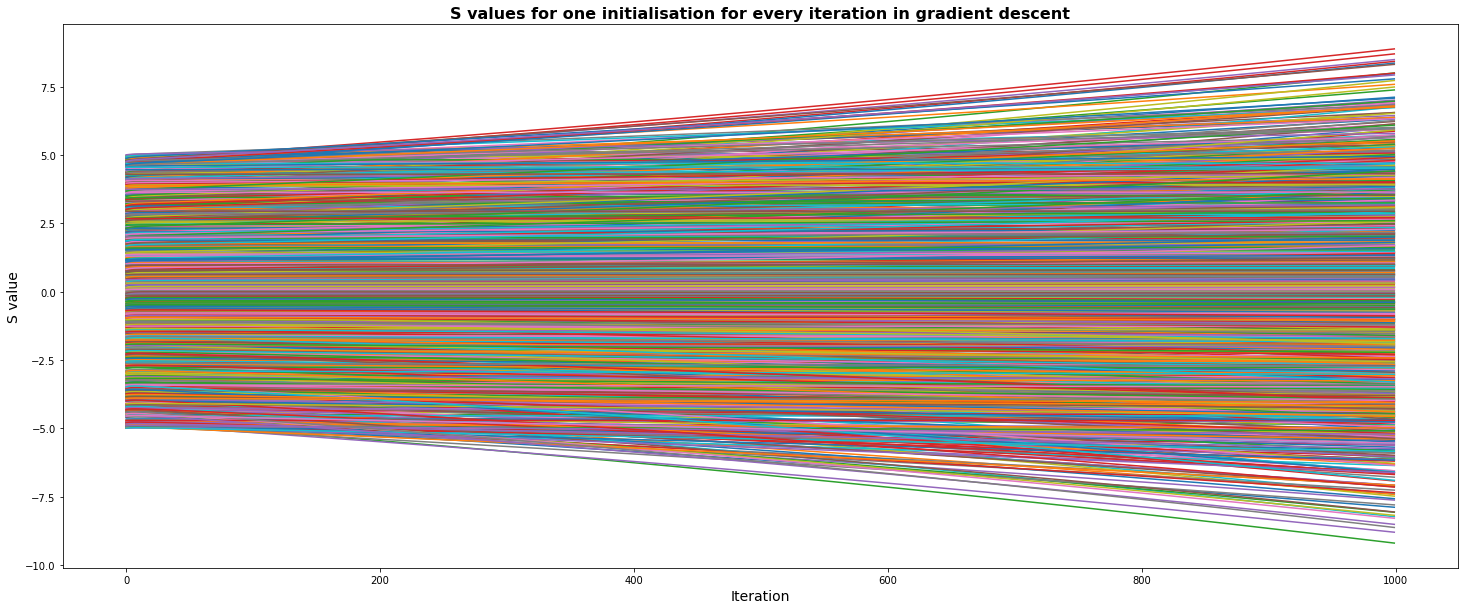

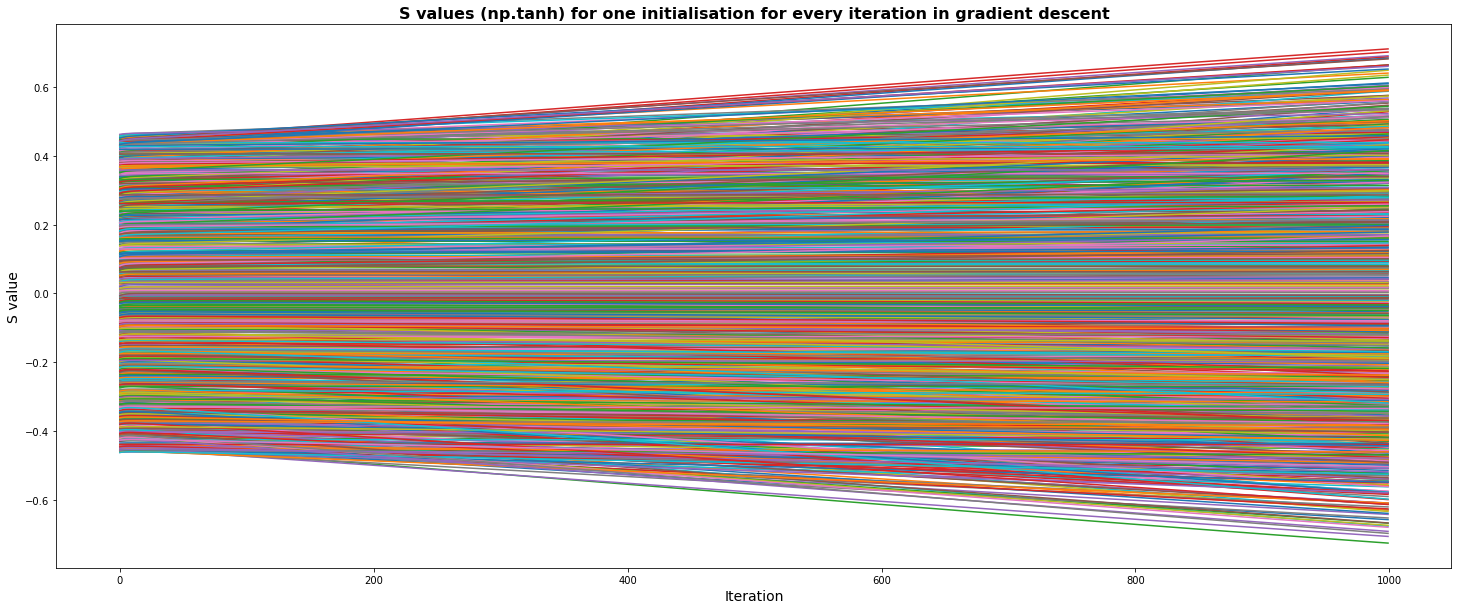

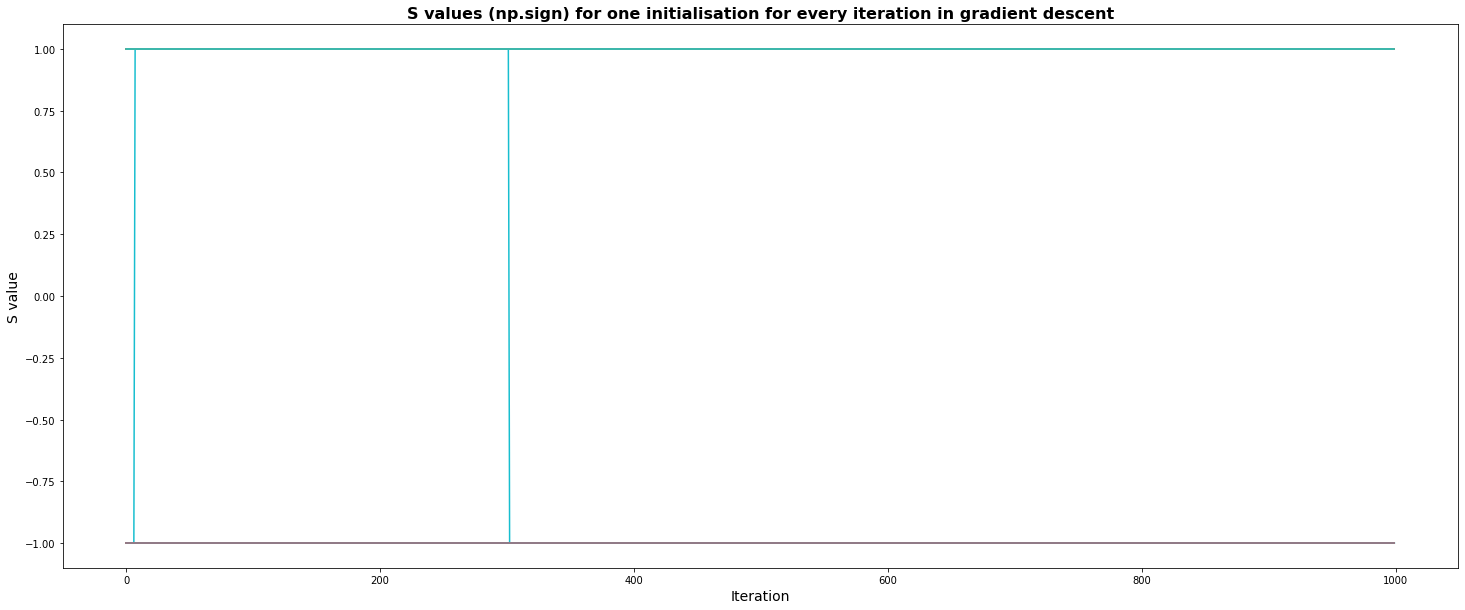

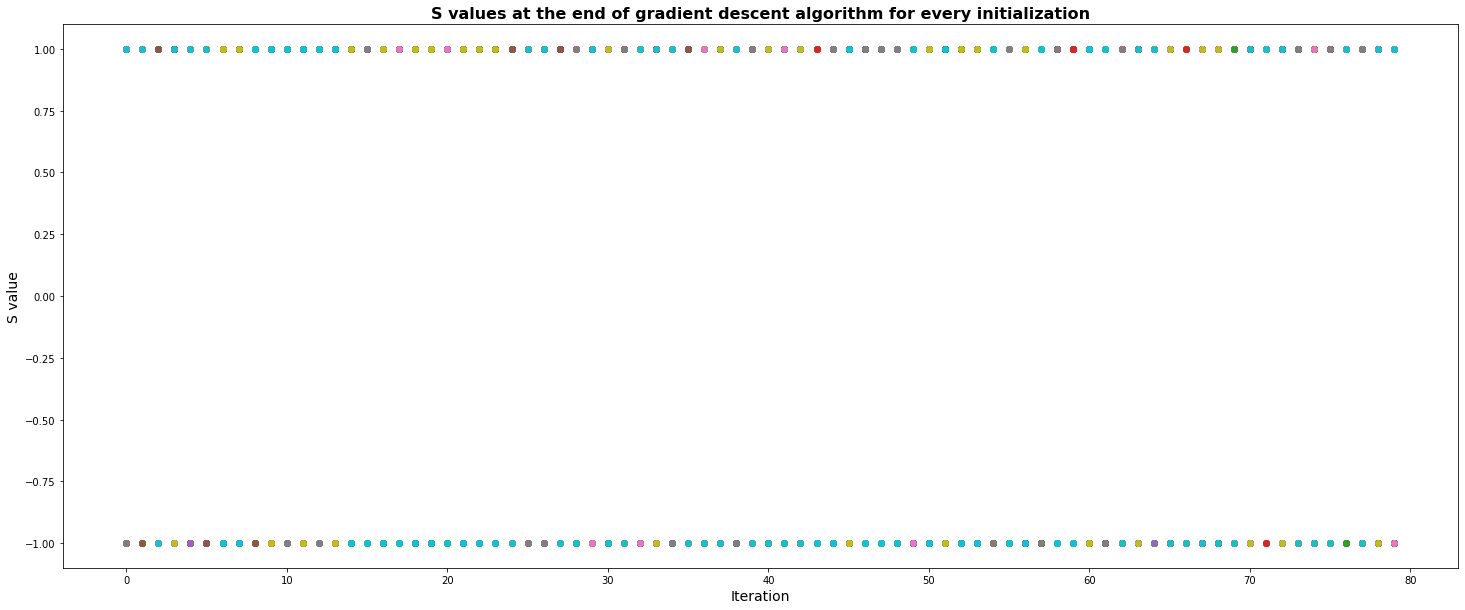

In [ ]:
n = np.array(100*np.random.rand(1000), dtype = np.float128)
full_dynamic(n);

Now, the idea is to implement this algorithm via Jij matrix in order to make this solver more universal for solving problems using Ising formulation.

# Optimized solver (using Jij)

In [ ]:
def Jij_init(n):
  return np.multiply(np.multiply(n,n.reshape(n.size,1)),np.ones((n.size,n.size))-np.eye(n.size)) 


def full_dynamic_Jij(n):

  start = time.time()

  lamb = 7.742636826811278e-07
  beta = 0.1 
  tau = 100.0

  print(f'Number set is: {n}')
  print('')

  H_outputs = []
  s_outputs = []

  s_loop_plot = []
  s_plot = []
  s_loop_sign_plot = []

  J_ij = Jij_init(n)

  for j in range(80):

    s_loop = 10.0*np.random.rand(n.size) - 5.0*np.ones(n.size)
  
    for i in range(1000):

      s=np.tanh(beta*s_loop)
      s_plot.append(s)

      diff = (-s_loop/tau - np.sum(J_ij*s,axis=1)) 
      s_loop = s_loop + lamb*diff

      s_loop_plot.append(s_loop)
      s_loop_sign_plot.append(np.sign(s_loop))

    s_outputs.append(np.sign(s_loop))
    H_outputs.append(np.square(np.dot(n,np.sign(s_loop))))

  best_H_ind = np.argmin(H_outputs)
  best_s = s_outputs[best_H_ind]

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_plot[0*i:1*i+1])
  plt.title("S values for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_plot[0*i:1*i+1])
  plt.title("S values (np.tanh) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(i+1),s_loop_sign_plot[0*i:1*i+1])
  plt.title("S values (np.sign) for one initialisation for every iteration in gradient descent", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  plt.figure(figsize = (25,10))
  plt.plot(range(j+1),s_outputs, 'o')
  plt.title("S values at the end of gradient descent algorithm for every initialization", fontweight = 'bold', fontsize = 16)
  plt.xlabel('Iteration',fontsize = 14)
  plt.ylabel('S value',fontsize = 14)

  if H_outputs[best_H_ind]==0:
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    print(f'The partioning is: R1 = {np.array(n)[np.where(best_s==1)]}, R2 = {np.array(n)[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}, epsilon = {eps}')
  else:
    print("The set can't be partioned")
    print(f'Optimal s: {best_s}')
    print(f'H(s) = {H_outputs[best_H_ind]}')
    #print(f'The partioning is: R1 = {np.array(n)[np.where(best_s==1)]}, R2 = {np.array(n)[np.where(best_s==-1)]}')
    print('')
    print(f'Additional: number of random initializations: {j}, lambda = {lamb}, beta = {beta}, tau = {tau}')

  end = time.time()
  print('')
  print(f'Calculation time: {end - start}')


Number set is: [84.62159344 96.2480409  19.67898331 79.47418708 79.0947346  88.99990863
 29.00529736 28.14131982 35.20079436 96.72681624  7.50114535 45.63268371
 98.97385    52.49795727  2.28370375 97.67015344 43.00598364 94.82825398
 57.10372873 95.38295808 74.64908568 73.5979712  27.67329408 46.01752962
 40.64538818 28.95632309 92.9878331  68.47576793 28.76277295 14.7676395
  6.71448061 83.50131764 74.66869772 63.30932679 71.03985685 31.95494988
 24.61648275  9.97263731 16.76491636  3.66359556  3.45697564 84.45520629
 14.78337723 15.17607371 58.34282263 92.20327969 10.2497733  99.26259996
 69.86813836 22.39039736 49.48189175 36.39633914 51.49526554  2.74391713
 47.23666582 69.44160998 17.75176382 99.95161935 23.18648482 66.4332744
 94.92040085 13.64746956 53.50567977 52.36259775 70.44753668 20.20315069
 44.99969705 41.32302849 59.05123086 91.27818576 44.64486272 75.86638331
 16.35829298 32.59976734 37.1335965  67.87034397 47.48039029 76.629146
  9.71281248 67.8130838  51.94661302 70.

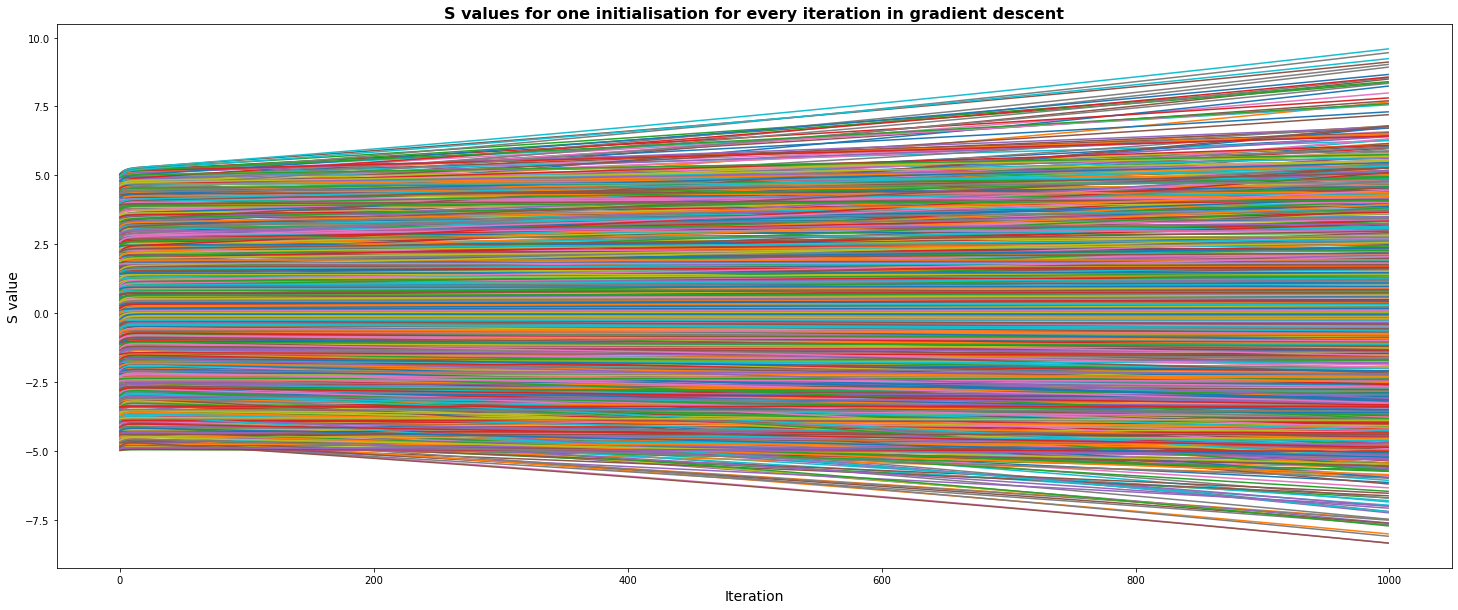

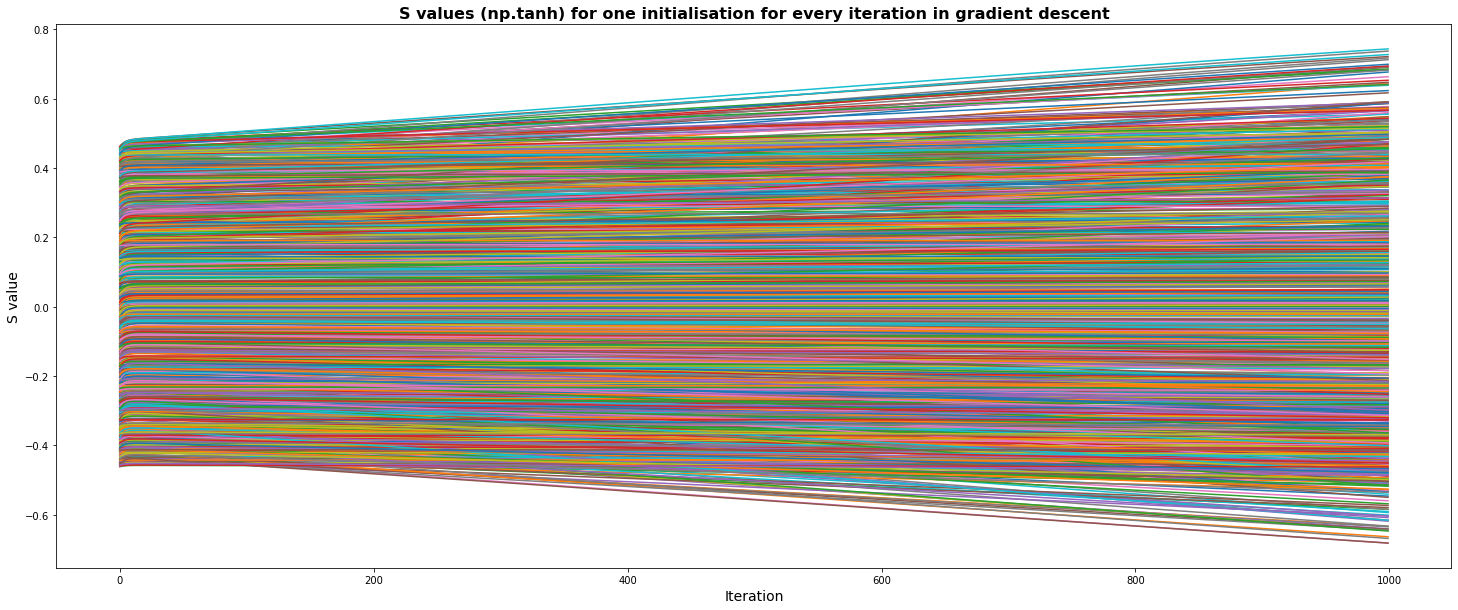

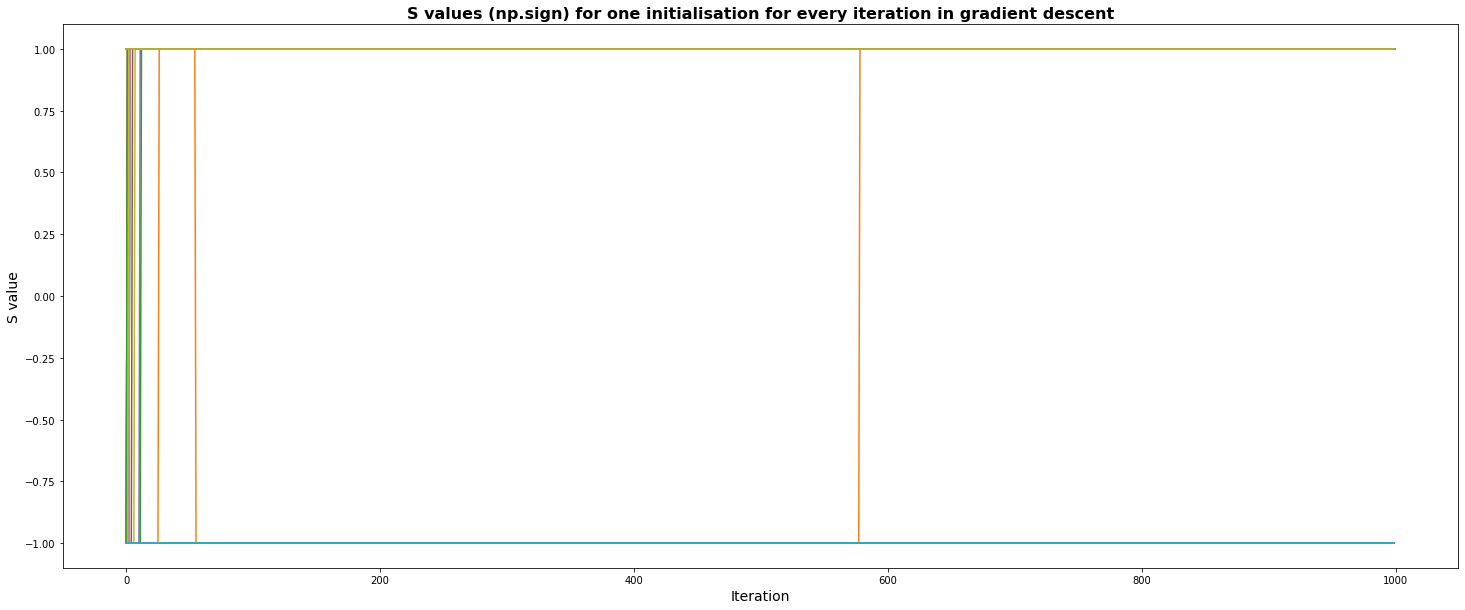

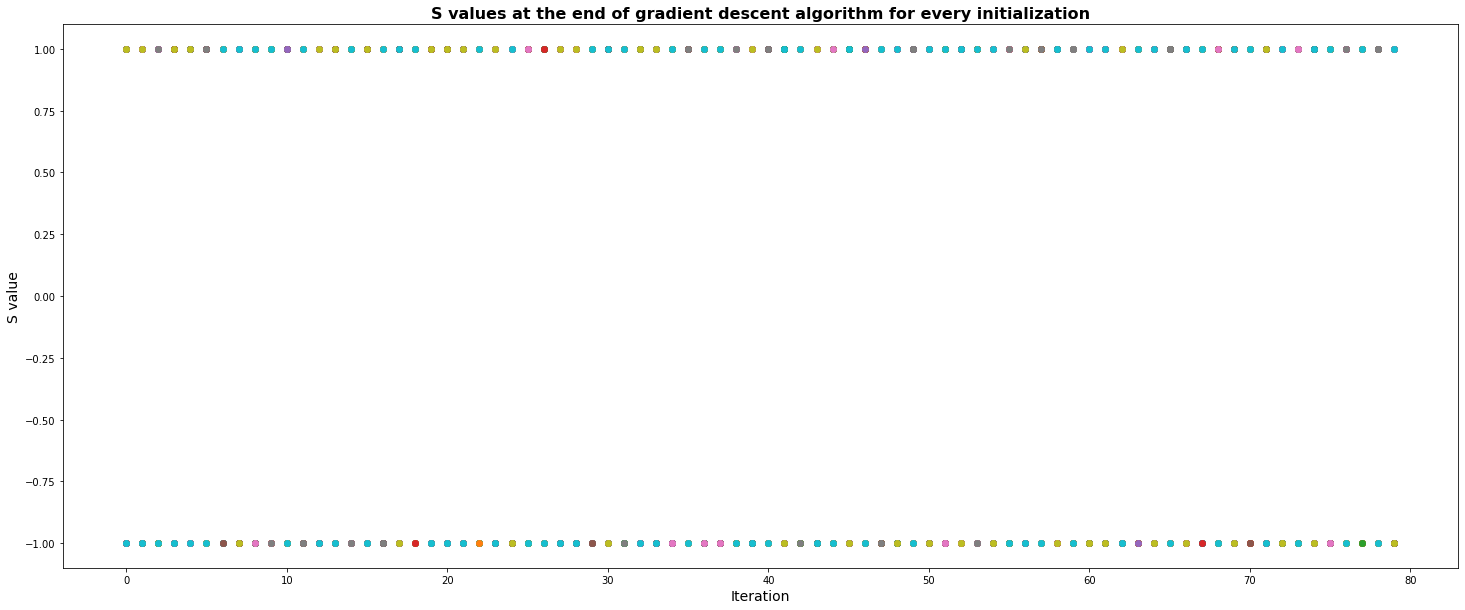

In [ ]:
n = np.array(100*np.random.rand(1000), dtype = np.float128)
full_dynamic_Jij(n);

Now, we can use this solver for solving different types of problems, which could be described using QUBO function and Ising formulation.

The next step is to prepare the Ising formulation of **Community detection** problem and calculate the Jij matrix for this problem.

# Community detection algorithms overview.



## Open-source solvers

*   **Girvan-Newman algorithm:** The Girvan-Newman algorithm detects communities by progressively removing edges from the original network.

*   **Fluid Communities algorithm:** This algorithm is based on the simple idea of fluids interacting in an environment, expanding and pushing each other.

*   **Label Propagation algorithm:** Label propagation is a semi-supervised machine learning algorithm that assigns labels to previously unlabeled data points.

*   **Clique Percolation algorithm:** The algorithm finds k-clique communities in a graph using the percolation method.

*   **Kernighan-Lin algorithm:** This algorithm partitions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets.

Source: [Understanding Community Detection Algorithms with Python NetworkX
](https://memgraph.com/blog/community_detection-algorithms_with_python_networkx)


We will firstly try algorithms on the graph with exactly known number of communities. We will take Zachary's karate club graph. It has two communities.

[Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

## Girvan-Newman algorithm


Number of communities: 2


Text(0.5, 1.0, 'Girvan-Newman detection')

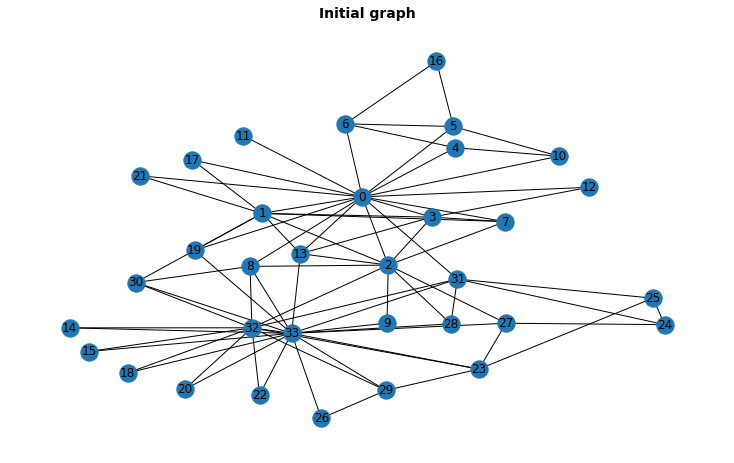

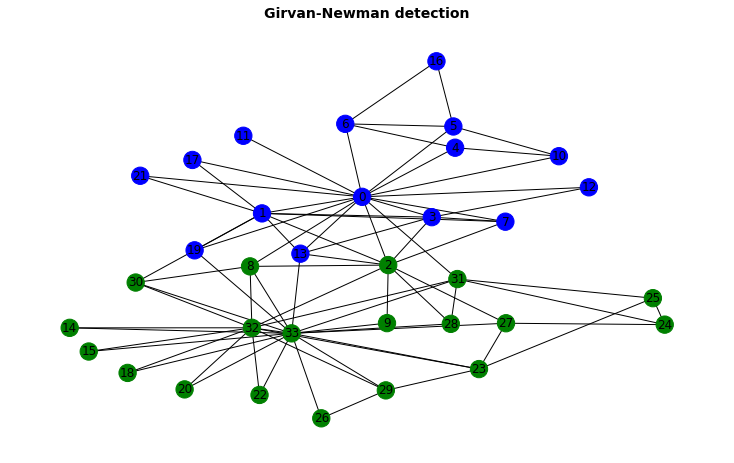

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
 
G = nx.karate_club_graph()
#G = nx.krackhardt_kite_graph()
#G = nx.newman_watts_strogatz_graph(60,3,0.5)

plt.figure(figsize = (10,6))
nx.draw(G,with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Initial graph', fontsize = 14, fontweight = 'bold')

communities = girvan_newman(G) # output is iterator

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

color_map = []
print(f'Number of communities: {len(node_groups)}')
for node in G:
  if node in node_groups[0]:
    color_map.append('blue')
  else:
    color_map.append('green')

plt.figure(figsize = (10,6))
nx.draw(G, node_color=color_map, with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Girvan-Newman detection', fontsize = 14, fontweight = 'bold')

## Label Propagation algorithm

Number of communities: 3


Text(0.5, 1.0, 'Label Propagation detection')

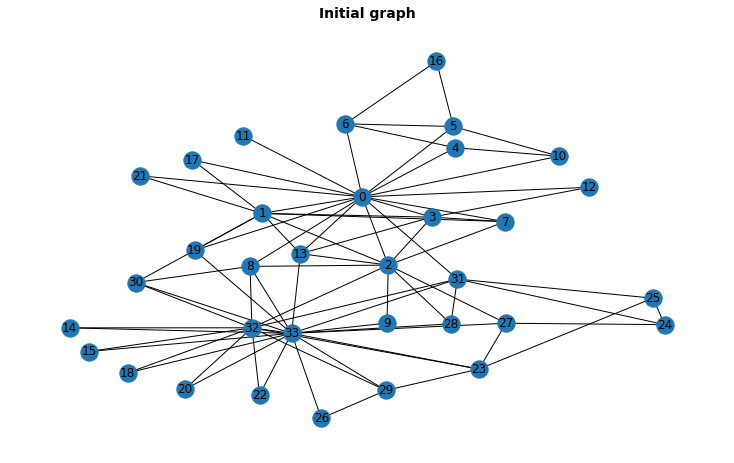

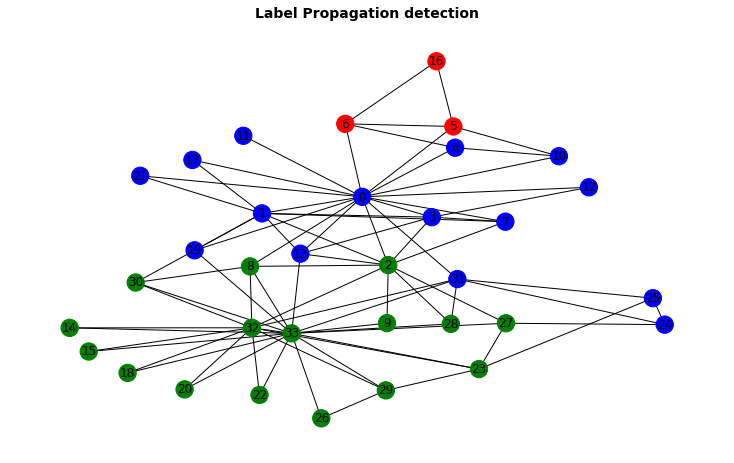

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community import label_propagation_communities
 
G = nx.karate_club_graph()
#G = nx.krackhardt_kite_graph()
#G = nx.newman_watts_strogatz_graph(60,3,0.5)

plt.figure(figsize = (10,6))
nx.draw(G,with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Initial graph', fontsize = 14, fontweight = 'bold')

communities = label_propagation_communities(G)
communities = list(communities)


# node_groups = []
# for com in next(communities):
#   node_groups.append(list(com))

color_map = []
print(f'Number of communities: {len(communities)}')
for node in G:
  if node in communities[0]:
    color_map.append('blue')
  elif node in communities[1]:
    color_map.append('green')
  elif node in communities[2]:
    color_map.append('red')
  else:
    color_map.append('black')


plt.figure(figsize = (10,6))
nx.draw(G, node_color=color_map, with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Label Propagation detection', fontsize = 14, fontweight = 'bold')

## Fluid Communities algorithm

Number of communities: 2


Text(0.5, 1.0, 'Fluid Communities detection, k = 2')

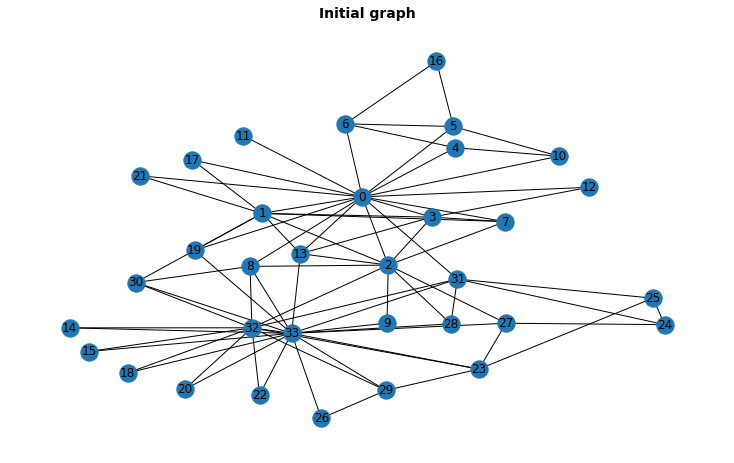

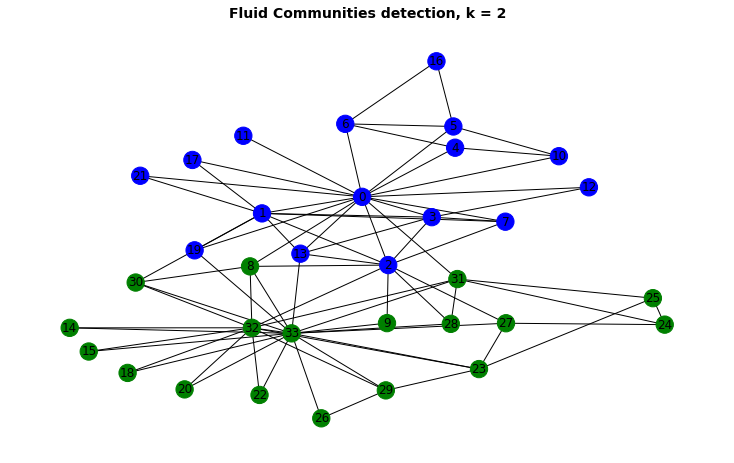

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.asyn_fluid import asyn_fluidc
 
G = nx.karate_club_graph()
#G = nx.krackhardt_kite_graph()
#G = nx.newman_watts_strogatz_graph(60,3,0.5)

plt.figure(figsize = (10,6))
nx.draw(G,with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Initial graph', fontsize = 14, fontweight = 'bold')

communities = asyn_fluidc(G,2)
communities = list(communities)


# node_groups = []
# for com in next(communities):
#   node_groups.append(list(com))

color_map = []
print(f'Number of communities: {len(communities)}')
for node in G:
  if node in communities[0]:
    color_map.append('blue')
  elif node in communities[1]:
    color_map.append('green')
  elif node in communities[2]:
    color_map.append('red')
  else:
    color_map.append('black')


plt.figure(figsize = (10,6))
nx.draw(G, node_color=color_map, with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Fluid Communities detection, k = 2', fontsize = 14, fontweight = 'bold')

## Clique Percolation algorithm

Number of communities: 3


Text(0.5, 1.0, 'Clique Percolation detection')

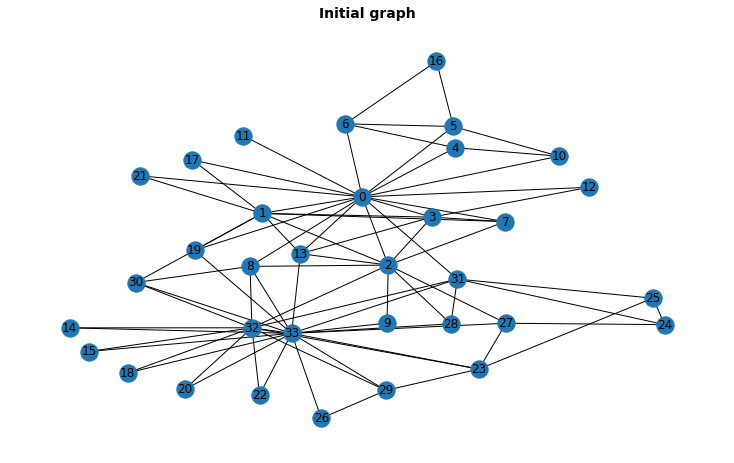

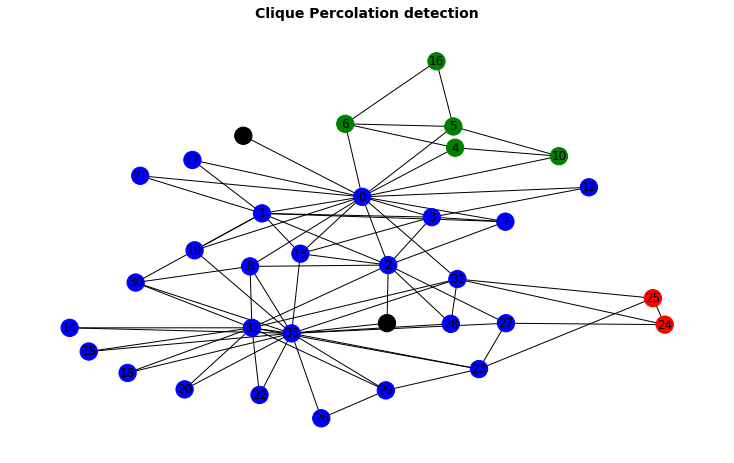

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.kclique import k_clique_communities
 
G = nx.karate_club_graph()
#G = nx.krackhardt_kite_graph()
#G = nx.newman_watts_strogatz_graph(60,3,0.5)

plt.figure(figsize = (10,6))
nx.draw(G,with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Initial graph', fontsize = 14, fontweight = 'bold')

communities = k_clique_communities(G,3)
communities = list(communities)


# node_groups = []
# for com in next(communities):
#   node_groups.append(list(com))

color_map = []
print(f'Number of communities: {len(communities)}')

for node in G:
  if node in communities[0]:
    color_map.append('blue')
  elif node in communities[1]:
    color_map.append('green')
  elif node in communities[2]:
    color_map.append('red')
  else:
    color_map.append('black')


plt.figure(figsize = (10,6))
nx.draw(G, node_color=color_map, with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Clique Percolation detection', fontsize = 14, fontweight = 'bold')

## Kernighan-Lin algorithm

Number of communities: 2


Text(0.5, 1.0, 'Kernighan-Lin detection')

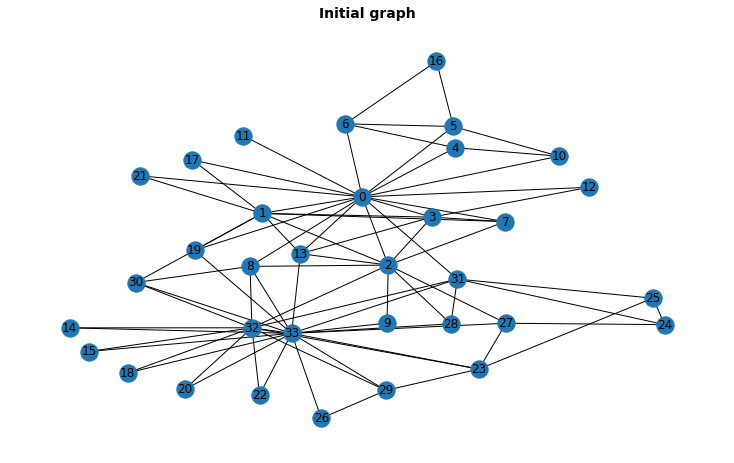

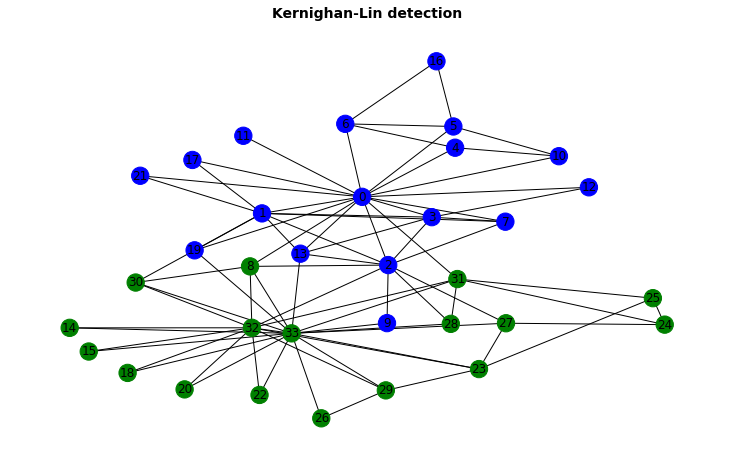

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.community.kernighan_lin import kernighan_lin_bisection
 
G = nx.karate_club_graph()
#G = nx.krackhardt_kite_graph()
#G = nx.newman_watts_strogatz_graph(60,3,0.5)

plt.figure(figsize = (10,6))
nx.draw(G,with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Initial graph', fontsize = 14, fontweight = 'bold')

communities = kernighan_lin_bisection(G)
communities = list(communities)


# node_groups = []
# for com in next(communities):
#   node_groups.append(list(com))

color_map = []
print(f'Number of communities: {len(communities)}')

for node in G:
  if node in communities[0]:
    color_map.append('blue')
  elif node in communities[1]:
    color_map.append('green')
  elif node in communities[2]:
    color_map.append('red')
  else:
    color_map.append('black')


plt.figure(figsize = (10,6))
nx.draw(G, node_color=color_map, with_labels=True, pos= nx.drawing.layout.kamada_kawai_layout(G))
plt.title('Kernighan-Lin detection', fontsize = 14, fontweight = 'bold')

As we can observe, the most universal and accurate methods are Girvan-Newman and Kernighan-Lin algorithms, as they do not need any information about the graph.

The next step is to explore this algorithms and more sophisticated like **Belief propagation** and **Message passing** in more details and understand, how can we reformulate them to correspond the Ising formulation.